# Goal of Code

The Goal of the code is to provide graphs of $V(t)$ and $X(t)$ for four oscillations with different damping characteristics. The Force equation was derived from Newton's Second Law and is show below

\begin{equation}\label{eq:}
\ddot{x}=-2\beta \dot{x} -\omega_0 x
\end{equation}


In [68]:
#Import packages that might be necessary
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
#Preliminary Variables
k=0.1   #Spring Constant
m=1   #Mass
w=15   #The oscillation frequency as defined in class
# Define the Force function
#The force function may be dependendant on the velocity, time, position, and mass so we must include 
#input parameters for all of these instances
def force(x,v,b):
    #b is the beta for the oscillation
    return -2*b*v-(w**2)*x
#Define an RK4 function that takes in a range for t, an initial v, initial x,beta(b), and a dt
# At some point I would like to do this using OOP so that it can be easily reproduced for other forces


In [69]:
def RK4(ti,tf,dt,b=0,x0=5,v0=-1):
    #Now we must define numpy arrays to house all of our data
    x=[x0]# We can already input x0 since it will be the same
    v=[v0]# Same as above.
    # For t, we can create an np array by using the arrange method
    t=np.arange(ti,tf+dt,dt)# The tf+dt is to ensure that the arrange method actually stops at the desired tf
    # Now we must program in the RK4 algorithm. The nice thing about having an array for t is that we dont
    #depend on those pesky while loop
    #we need to keep track of an index
    i=1
    #We set i=1 becuase we want to make sure all three data sets have the same length
    #We need to also start at t[1] since we already have values for t=0 
    for h in t[1:]:
        x1=x[i-1]+v[i-1]*(dt/2)
        v1=v[i-1]+force(x[i-1],v[i-1],b)*(dt/2)
        x2=x[i-1]+v1*(dt/2)
        v2=v[i-1]+force(x1,v1,b)*(dt/2)
        x3=x[i-1]+v2*(dt)
        v3=v[i-1]+force(x2,v2,b)*(dt)
        x4=x[i-1]+v3*(dt)
        v4=v[i-1]+force(x3,v3,b)*(dt)
        #Now we must combine everything!
        x.append((1/3)*(x1+2*x2+x3+(x4/2))-(x[i-1]/2))
        v.append((1/3)*(v1+2*v2+v3+(v4/2))-(v[i-1]/2))
        i+=1#increment the counter
    #I would like the output of the RK4 method to be a pd dataframe we will do that below
    #Firse make a dictionary of values
    table0={"Time":t,"Velocity":v,"Position":x}
    table=pd.DataFrame(table0)
    return table, x, v, t  #We will make sure we output all of the arrays and tables we need

## Running the Algorithm for the input parameters we are interested in seeing

In [70]:
dt=0.01
# Beta=0
# any variable with a 1 is to be associated with the beta=0 data set
table1,x1,v1,t1=RK4(0,10,dt,0)
# Beta=w/20
# any variable with a 2 is to be associated with the beta=w/20 data set
table2,x2,v2,t2=RK4(0,10,dt,w/20)
# Beta=5w
# any variable with a 3 is to be associated with the beta=5w data set
table3,x3,v3,t3=RK4(0,10,dt,5*w)
# Beta=w
# any variable with a 4 is to be associated with the beta=w data set
table4,x4,v4,t4=RK4(0,10,dt,w)
print(table1.head())
print('\n')
print(table2.head())
print('\n')
print(table3.head())
print('\n')
print(table4.head())

   Position  Time   Velocity
0  5.000000  0.00  -1.000000
1  4.933893  0.01 -12.196584
2  4.756982  0.02 -23.119259
3  4.473241  0.03 -33.522728
4  4.089041  0.04 -43.173353


   Position  Time   Velocity
0  5.000000  0.00  -1.000000
1  4.934248  0.01 -12.098169
2  4.759489  0.02 -22.761441
3  4.481243  0.03 -32.758605
4  4.107253  0.04 -41.876741


   Position  Time  Velocity
0  5.000000  0.00 -1.000000
1  4.956599  0.01 -5.705802
2  4.890784  0.02 -6.915657
3  4.819627  0.03 -7.167256
4  4.747802  0.04 -7.157066


   Position  Time   Velocity
0  5.000000  0.00  -1.000000
1  4.940452  0.01 -10.414340
2  4.800482  0.02 -17.186604
3  4.603650  0.03 -21.870172
4  4.368513  0.04 -24.915523


## Plot the Data

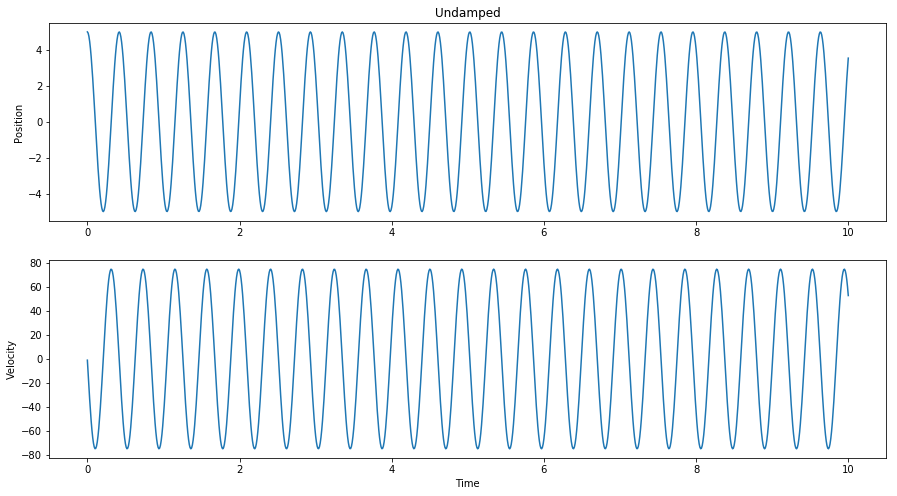

In [71]:
#Now Plot the data!
plt.figure(figsize=[15,8])
plt.subplot(211)
plt.title("Undamped")
plt.plot(t1,x1)
plt.ylabel("Position")
plt.subplot(212)
plt.plot(t1,v1)
plt.ylabel("Velocity")
plt.xlabel("Time")

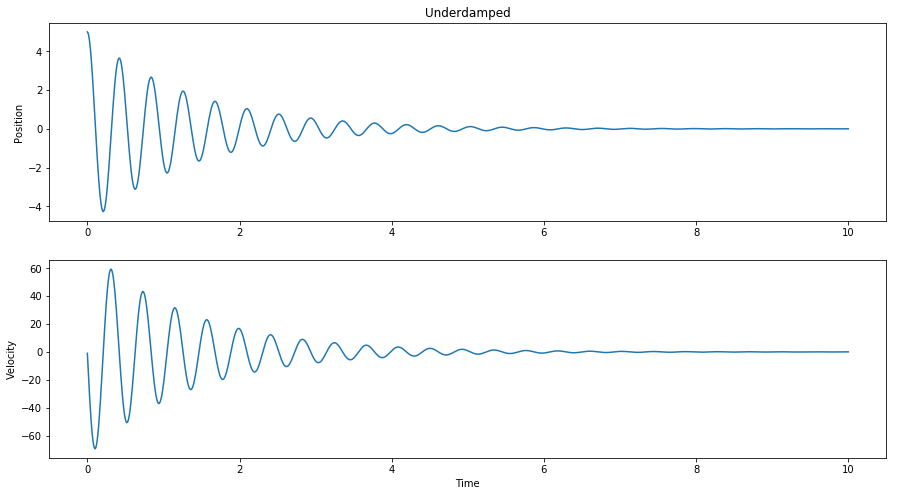

In [72]:
plt.figure(figsize=[15,8])
plt.subplot(211)
plt.title("Underdamped")
plt.plot(t2,x2)
plt.ylabel("Position")
plt.subplot(212)
plt.plot(t2,v2)
plt.ylabel("Velocity")
plt.xlabel("Time")

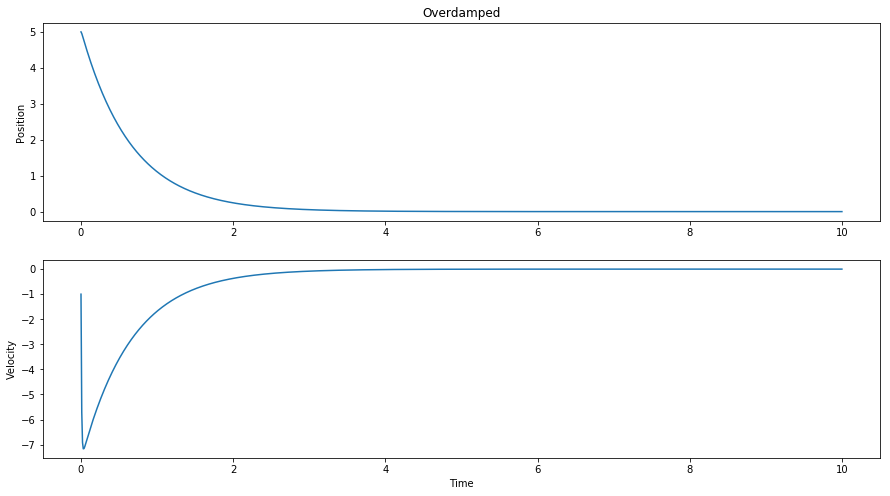

In [73]:
plt.figure(figsize=[15,8])
plt.subplot(211)
plt.title("Overdamped")
plt.plot(t3,x3)
plt.ylabel("Position")
plt.subplot(212)
plt.plot(t3,v3)
plt.ylabel("Velocity")
plt.xlabel("Time")

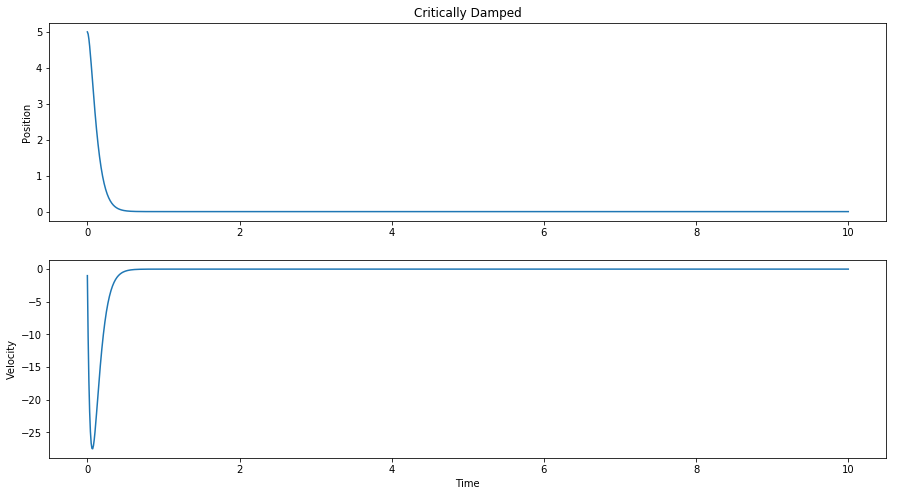

In [74]:
plt.figure(figsize=[15,8])
plt.subplot(211)
plt.title("Critically Damped")
plt.plot(t4,x4)
plt.ylabel("Position")
plt.subplot(212)
plt.plot(t4,v4)
plt.ylabel("Velocity")
plt.xlabel("Time")

 ## Now for a final plot with all the functions!

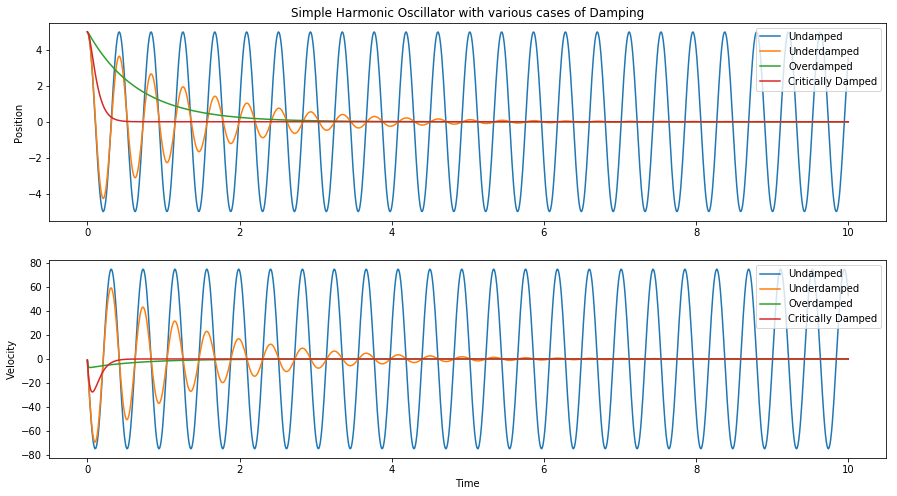

In [75]:
plt.figure(figsize=[15,8])
plt.subplot(211)
plt.title("Simple Harmonic Oscillator with various cases of Damping")
plt.plot(t1,x1,t2,x2,t3,x3,t4,x4)
plt.legend(["Undamped","Underdamped","Overdamped","Critically Damped"])
plt.ylabel("Position")
plt.subplot(212)
plt.plot(t1,v1,t2,v2,t3,v3,t4,v4)
plt.legend(["Undamped","Underdamped","Overdamped","Critically Damped"])
plt.ylabel("Velocity")
plt.xlabel("Time")